In [ ]:
pip install tensorflow

# **Importing the dataset and inital setup**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers, callbacks, optimizers,regularizers,initializers

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the entire dataset
(x_train_entire, y_train_entire), (x_test_entire, y_test_entire) = keras.datasets.mnist.load_data(path="mnist.npz")

**Normalizing into 0 and 1 and choosing the 0 and 3 from the whole dataset**

In [ ]:
# Normalizing into 0 and 1
x_train_entire = x_train_entire / 255.0
x_test_entire = x_test_entire / 255.0

# Keeping 0 and 3 digits
def required_two_digits(x,y, digits):
  mask = (y == digits[0]) | (y == digits[1])
  x, y = x[mask], y[mask]
  y = np.where(y == digits[0], 0, 1)
  return x, y

x_train_binary, y_train_binary = required_two_digits(x_train_entire, y_train_entire, [0, 3])

**Splitting the dataset into 80% training and 20% testing. Then, from the training portion, it's further split into 90% for training and 10% for validation.**

In [ ]:
#Splitting the filtered dataset into train and test and random_state is set to 33 since SJSU ID: 017586933
x_train, x_test, y_train, y_test = train_test_split(x_train_binary, y_train_binary, test_size=0.2, random_state=33)

#Splitting the data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=33)

In [ ]:
# Flatten the images to 1D array
x_train = x_train.reshape(len(x_train), -1)
x_val   = x_val.reshape(len(x_val), -1)
x_test  = x_test.reshape(len(x_test), -1)

**Dimension of each dataset split**

In [ ]:
print(f"Entire dataset shape:{x_train_entire.shape}")
print(f"Binary dataset shape after choosing 0 and 3:{x_train_binary.shape}")
print(f"Train dataset shape:{x_train.shape}")
print(f"Validation dataset shape:{x_val.shape}")
print(f"Test dataset shape:{x_test.shape}")

Entire dataset shape:(60000, 28, 28)
Binary dataset shape after choosing 0 and 3:(12054, 28, 28)
Train dataset shape:(8678, 784)
Validation dataset shape:(965, 784)
Test dataset shape:(2411, 784)


# **Problem 2**

### **Problem 2A**

<b> Building the model with 128 input neurons, 64 neurons in the hidden layer and 1 output neuron. Added dropout layer(rate=0.3) to avoid overfitting and also used early stopping </b>

In [ ]:
def build_model(input_dim=784):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
        layers.Dense(1, activation="sigmoid") \
    ])
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_model()

early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9515 - loss: 0.1135 - val_accuracy: 0.9938 - val_loss: 0.0198
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9940 - loss: 0.0183 - val_accuracy: 0.9938 - val_loss: 0.0158
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9969 - val_loss: 0.0130
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9974 - loss: 0.0058 - val_accuracy: 0.9979 - val_loss: 0.0087
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9979 - val_loss: 0.0070
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9991 - loss: 0.0024 - val_accuracy: 0.9979 - val_loss: 0.0085
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9969 - val_loss: 0.0086
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9998 - loss: 8.7277e-04 - val_accuracy

**Model evaluation on the test data(x_test)**

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

y_pred_probability = model.predict(x_test)

#Taking thereshold of 0.5
y_pred = (y_pred_probability > 0.5).astype(int)

Test Accuracy: 0.9970966577529907
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(f"Predicted output shape: {y_pred.shape}")

Predicted output shape: (2411, 1)


**Confusion matrix**

 classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00      1274

    accuracy                           1.00      2411
   macro avg       1.00      1.00      1.00      2411
weighted avg       1.00      1.00      1.00      2411

Confusion Matrix: [[1134    3]
 [   4 1270]]


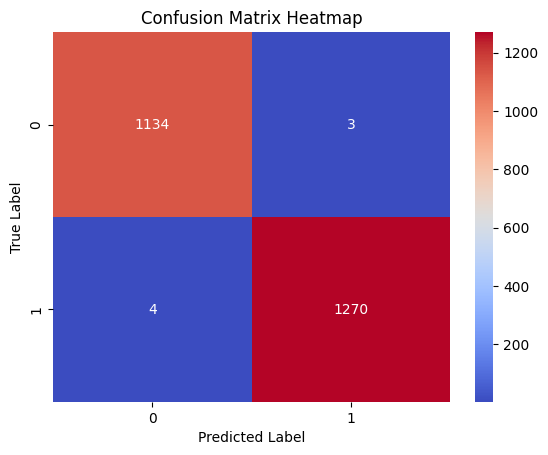

In [ ]:
print(f" classification report:\n {classification_report(y_test, y_pred)}")

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix: {conf_matrix}")

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

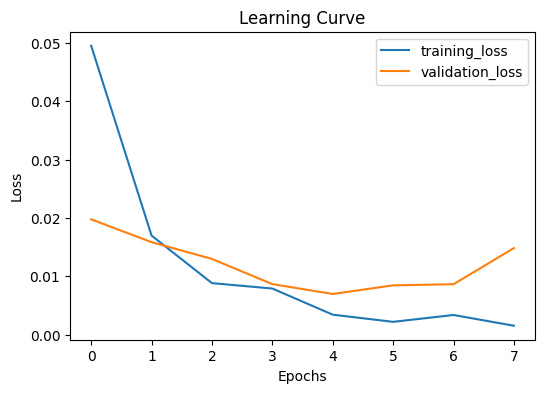

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="training_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.xlabel("Epochs");
plt.ylabel("Loss")
plt.legend();
plt.title("Learning Curve")
plt.show()

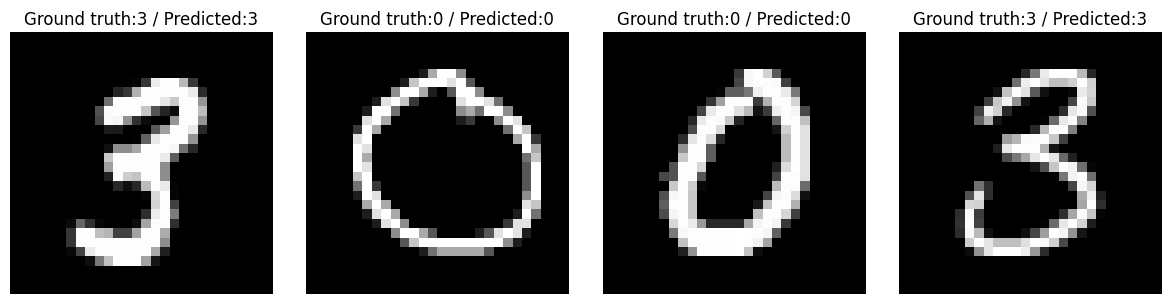

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

indices = np.random.choice(len(x_test), size=4, replace=False)
label_map = {0: 0, 1: 3}

for x,i in zip(axes, indices):
    reshaped_image = x_test[i].reshape(28, 28)
    x.imshow(reshaped_image, cmap="gray")
    x.set_title(f"Ground truth:{label_map[y_test[i]]} / Predicted:{label_map[y_pred[i,0]]}")
    x.axis("off")

plt.tight_layout()
plt.show()

### **Problem 2B**

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9606 - loss: 0.1175 - val_accuracy: 0.9927 - val_loss: 0.0177
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9940 - loss: 0.0170 - val_accuracy: 0.9927 - val_loss: 0.0174
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0090 - val_accuracy: 0.9979 - val_loss: 0.0081
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9980 - loss: 0.0054 - val_accuracy: 0.9969 - val_loss: 0.0079
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9979 - val_loss: 0.0082
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9960 - loss: 0.0100 - val_accuracy: 0.9979 - val_loss: 0.0077
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9990 - loss: 0.0051 - val_accuracy: 0.9979 - val_loss: 0.0074
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.

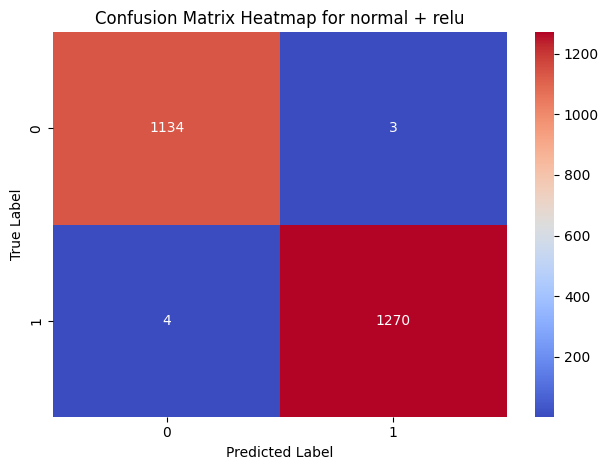

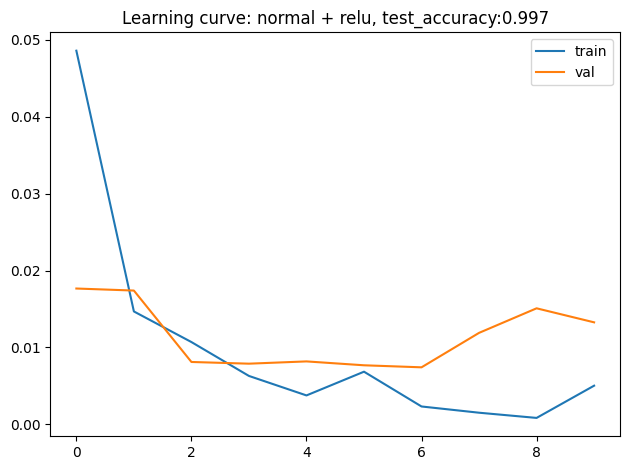

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8980 - loss: 0.2601 - val_accuracy: 0.9917 - val_loss: 0.0249
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9935 - loss: 0.0248 - val_accuracy: 0.9938 - val_loss: 0.0218
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9927 - val_loss: 0.0233
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9907 - val_loss: 0.0235
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9961 - loss: 0.0111 - val_accuracy: 0.9948 - val_loss: 0.0209
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9938 - val_loss: 0.0224
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.9948 - val_loss: 0.0198
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9978 - loss: 0.0077 - val_accuracy: 0.

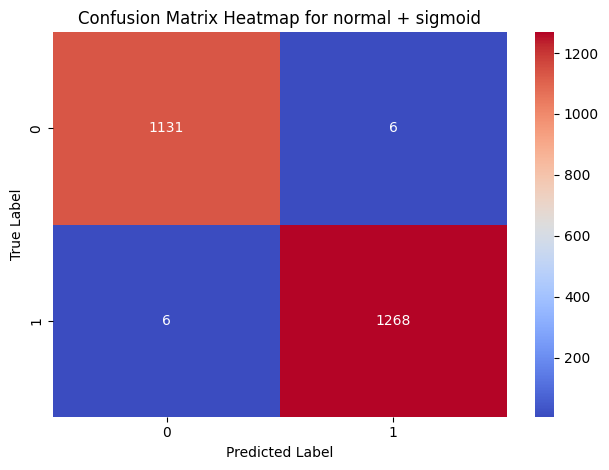

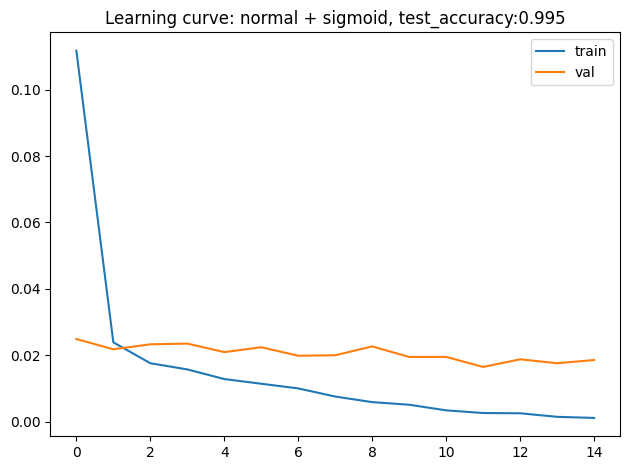

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9667 - loss: 0.0982 - val_accuracy: 0.9938 - val_loss: 0.0264
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9944 - loss: 0.0204 - val_accuracy: 0.9907 - val_loss: 0.0292
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9943 - loss: 0.0143 - val_accuracy: 0.9938 - val_loss: 0.0220
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9968 - loss: 0.0106 - val_accuracy: 0.9938 - val_loss: 0.0189
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9973 - loss: 0.0077 - val_accuracy: 0.9938 - val_loss: 0.0245
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9973 - loss: 0.0061 - val_accuracy: 0.9969 - val_loss: 0.0168
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9953 - loss: 0.0093 - val_accuracy: 0.9948 - val_loss: 0.0190
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9974 - loss: 0.0058 - val_accuracy: 0.

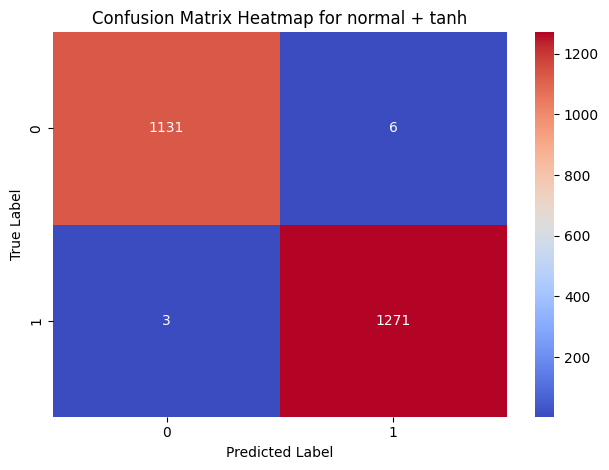

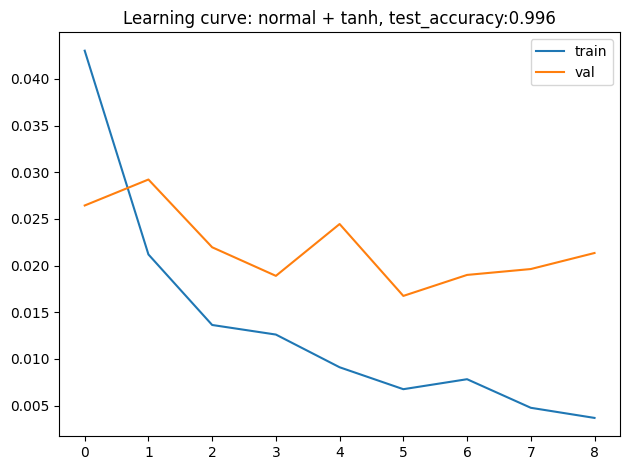

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9490 - loss: 0.1337 - val_accuracy: 0.9917 - val_loss: 0.0177
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9951 - loss: 0.0142 - val_accuracy: 0.9990 - val_loss: 0.0087
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9967 - loss: 0.0090 - val_accuracy: 0.9969 - val_loss: 0.0091
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9979 - val_loss: 0.0059
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9990 - val_loss: 0.0066
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9988 - loss: 0.0027 - val_accuracy: 0.9959 - val_loss: 0.0096
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9978 - loss: 0.0061 - val_accuracy: 0.9979 - val_loss: 0.0087
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 classification report:
               precision    recall  f1-sc

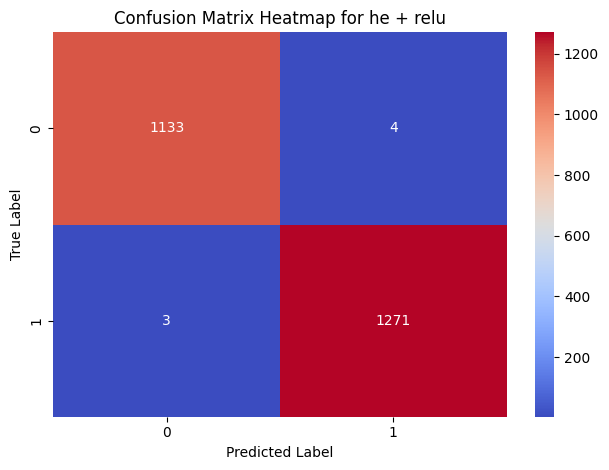

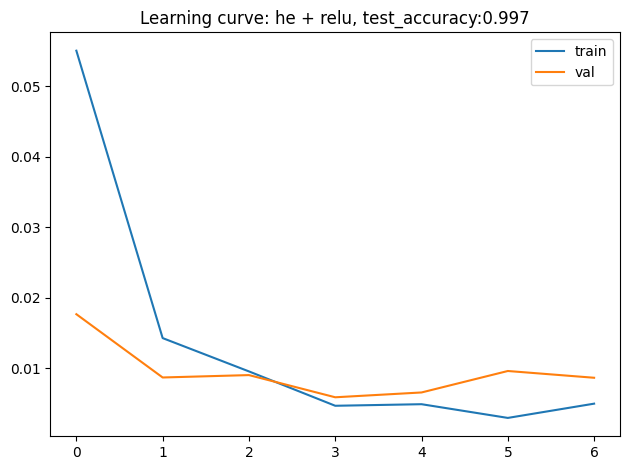

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9176 - loss: 0.2537 - val_accuracy: 0.9927 - val_loss: 0.0265
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9907 - val_loss: 0.0247
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9927 - val_loss: 0.0239
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9946 - loss: 0.0145 - val_accuracy: 0.9969 - val_loss: 0.0185
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9969 - val_loss: 0.0178
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9961 - loss: 0.0111 - val_accuracy: 0.9907 - val_loss: 0.0293
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9969 - val_loss: 0.0177
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.

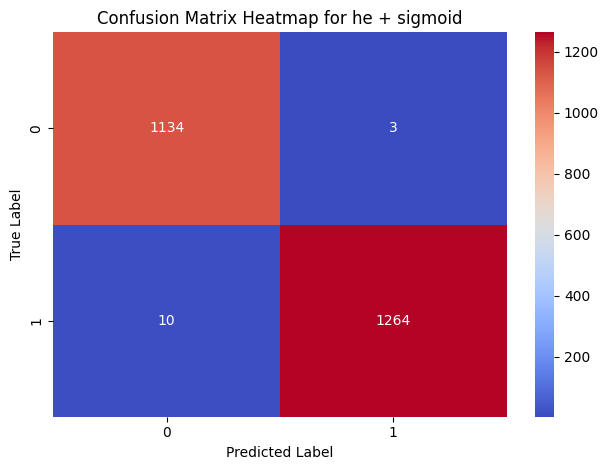

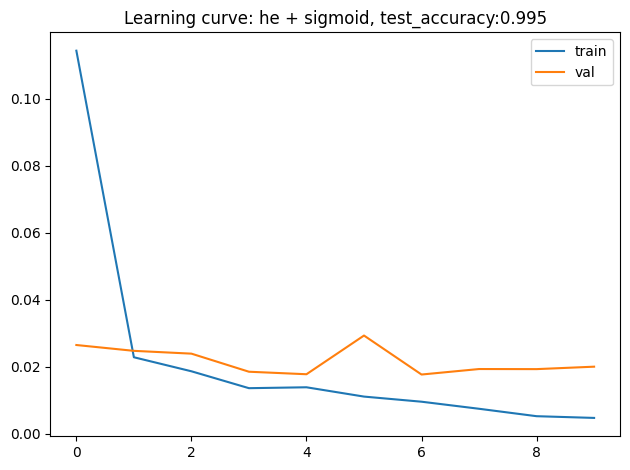

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9751 - loss: 0.0729 - val_accuracy: 0.9938 - val_loss: 0.0210
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9943 - loss: 0.0171 - val_accuracy: 0.9927 - val_loss: 0.0259
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9942 - loss: 0.0144 - val_accuracy: 0.9938 - val_loss: 0.0231
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9947 - loss: 0.0128 - val_accuracy: 0.9979 - val_loss: 0.0126
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9974 - loss: 0.0068 - val_accuracy: 0.9969 - val_loss: 0.0116
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9969 - val_loss: 0.0193
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9959 - val_loss: 0.0213
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 0.

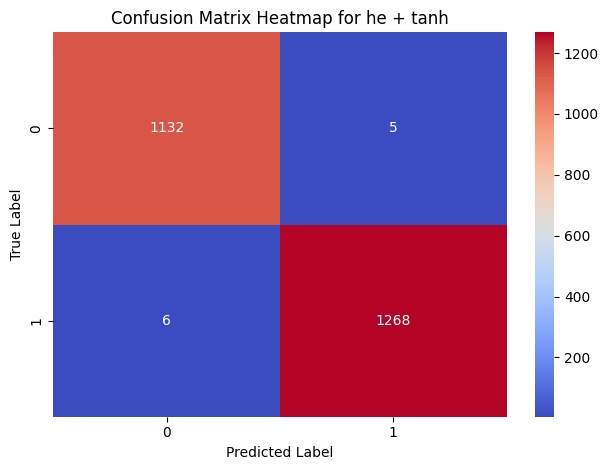

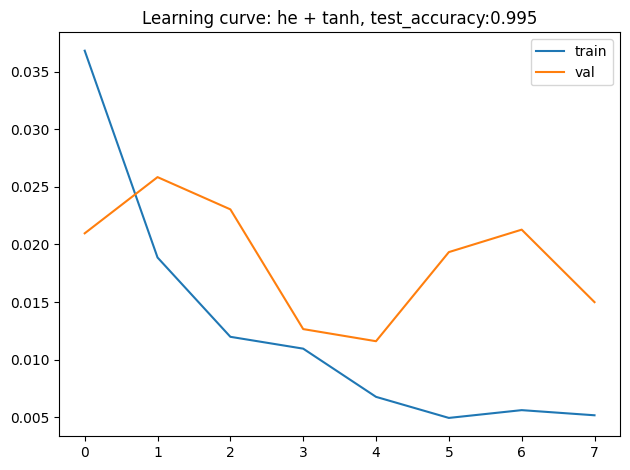

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9405 - loss: 0.1386 - val_accuracy: 0.9948 - val_loss: 0.0152
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9969 - val_loss: 0.0115
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.9990 - val_loss: 0.0083
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9974 - loss: 0.0077 - val_accuracy: 0.9917 - val_loss: 0.0340
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9978 - loss: 0.0062 - val_accuracy: 0.9959 - val_loss: 0.0123
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9959 - val_loss: 0.0082
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9979 - val_loss: 0.0120
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.

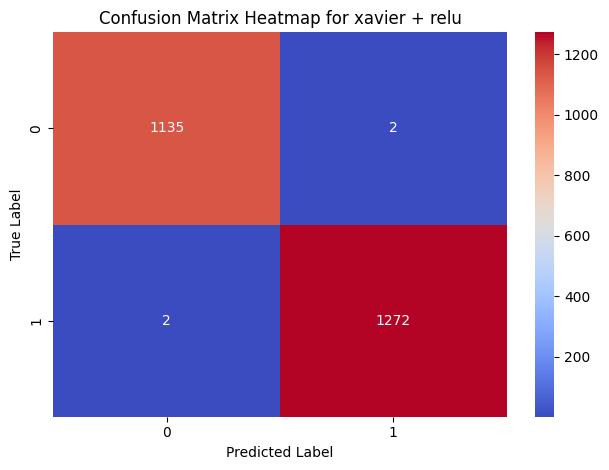

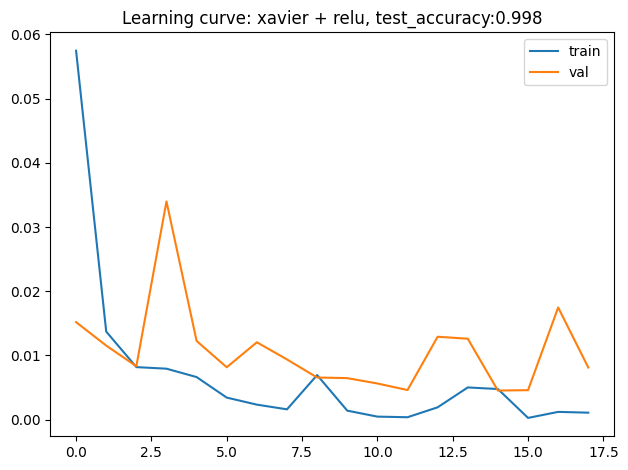

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9144 - loss: 0.2463 - val_accuracy: 0.9917 - val_loss: 0.0264
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9927 - val_loss: 0.0221
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accuracy: 0.9959 - val_loss: 0.0197
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9948 - val_loss: 0.0187
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9969 - val_loss: 0.0180
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9965 - loss: 0.0092 - val_accuracy: 0.9907 - val_loss: 0.0268
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9967 - loss: 0.0082 - val_accuracy: 0.9969 - val_loss: 0.0178
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9976 - loss: 0.0082 - val_accuracy: 0.

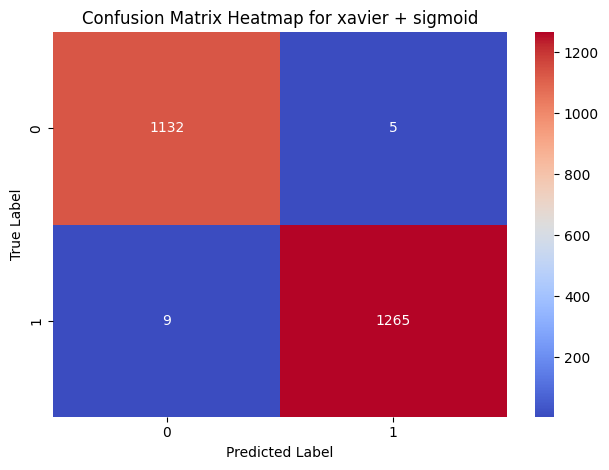

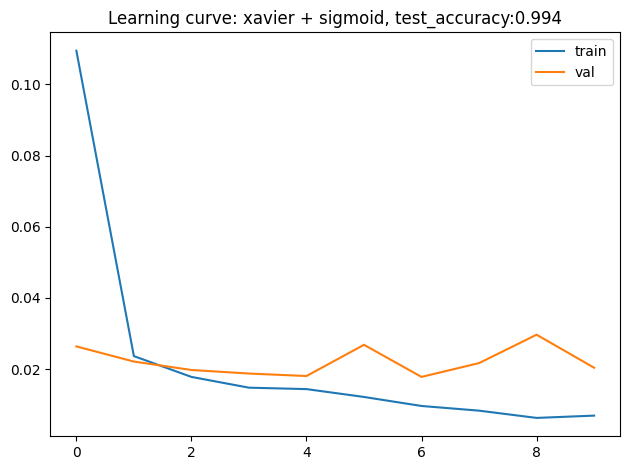

Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9601 - loss: 0.0924 - val_accuracy: 0.9938 - val_loss: 0.0203
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9937 - loss: 0.0153 - val_accuracy: 0.9927 - val_loss: 0.0259
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9927 - val_loss: 0.0230
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.9938 - val_loss: 0.0222
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       1.00      0.99      0.99      1274

    accuracy                           0.99      2411
   macro avg       0.99      0.99      0.99      2411
weighted avg       0.99      0.99      0.99      2411

Confusion Matrix for xavier + tanh: [[1132    5]
 [  10 1264]]


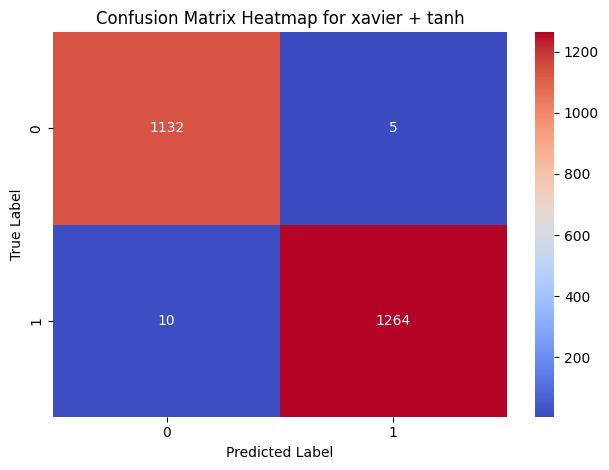

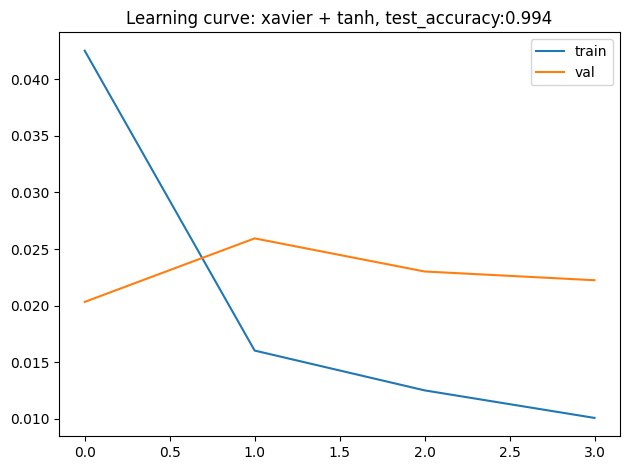

In [ ]:
initializers_dict = {
    "normal": initializers.RandomNormal(),
    "he": initializers.HeNormal(),
    "xavier": initializers.GlorotNormal()
}

activation_functions = ["relu", "sigmoid", "tanh"]

results = []

for initializer_name, initializer in initializers_dict.items():
    for function in activation_functions:
            model = models.Sequential([
            layers.Input(shape=(784,)),
            layers.Dense(128, activation=function, kernel_initializer=initializer),
            layers.Dropout(0.3),
            layers.Dense(64, activation=function, kernel_initializer=initializer),
            layers.Dense(1, activation="sigmoid") \
               ])

            model.compile(optimizer="adam",
                          loss="binary_crossentropy",
                          metrics=["accuracy"])

            early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

            history = model.fit(
                x_train, y_train,
                validation_data=(x_val, y_val),
                epochs=50,
                batch_size=32,
                callbacks=[early_stopping],
                verbose=1
            )

            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
            results.append((initializer_name, function, test_acc))

            y_pred_probability = model.predict(x_test)
            y_pred = (y_pred_probability > 0.5).astype(int)
            print(f" classification report:\n {classification_report(y_test, y_pred)}")


            conf_matrix = confusion_matrix(y_test, y_pred)
            print(f"Confusion Matrix for {initializer_name} + {function}: {conf_matrix}")

            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix Heatmap for {initializer_name} + {function}")
            plt.tight_layout()
            plt.show()

            plt.plot(history.history["loss"], label="train")
            plt.plot(history.history["val_loss"], label="val")
            plt.title(f"Learning curve: {initializer_name} + {function}, test_accuracy:{round(test_acc,3)}")
            plt.legend();
            plt.tight_layout()
            plt.show()



In [ ]:
df = pd.DataFrame(results, columns=["Initializer", "Activation", "Accuracy"])
print("\nSummary Table:\n")
print(df.pivot(index="Initializer", columns="Activation", values="Accuracy"))


Summary Table:

Activation       relu   sigmoid      tanh
Initializer                              
he           0.997097  0.994608  0.995438
normal       0.997097  0.995023  0.996267
xavier       0.998341  0.994193  0.993779


# **Problem 3**

**Splitting the dataset of 10 classes into 80% training and 20% testing. Then, from the training portion, it's further split into 90% for training and 10% for validation.**

In [ ]:
#Splitting the entire dataset into train and test and randome_state is set to 33 for multiclass classification
x_train_multi_10, x_test_multi_10, y_train_multi_10, y_test_multi_10 = train_test_split(x_train_entire, y_train_entire, test_size=0.2, random_state=33)

#Splitting the filtered(10 class) dataset into train and validation
x_train_multi, x_val_multi, y_train_multi, y_val_multi = train_test_split(x_train_multi_10, y_train_multi_10, test_size=0.1, random_state=33)

In [ ]:
x_train_multi = x_train_multi.reshape(len(x_train_multi), -1)
x_val_multi   = x_val_multi.reshape(len(x_val_multi), -1)
x_test_multi_10  = x_test_multi_10.reshape(len(x_test_multi_10), -1)

In [ ]:
print(f"Entire dataset shape:{x_train_entire.shape}")
print(f"Binary dataset shape of 10 classes:{x_train_multi_10.shape}")
print(f"Train dataset shape:{x_train_multi.shape}")
print(f"Validation dataset shape:{x_val_multi.shape}")
print(f"Test dataset shape:{x_test_multi_10.shape}")

Entire dataset shape:(60000, 28, 28)
Binary dataset shape of 10 classes:(48000, 28, 28)
Train dataset shape:(43200, 784)
Validation dataset shape:(4800, 784)
Test dataset shape:(12000, 784)


<b> Building the multiclassification model with 128 input neurons, 64 neurons in the hidden layer and 10 output neuron. Added dropout layer(rate=0.3) to avoid overfitting and also used early stopping </b>

In [ ]:
def build_multiclass_model(learn_rate, input_dim=784):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
        #used softmax for multiclass output
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=learn_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

batch_sizes = [4, 16, 32]
learning_rate = [0.01, 0.001, 0.0001]

results = []

for batch_size in batch_sizes:
    for lr in learning_rate:
        model = build_multiclass_model(learn_rate=lr)
        history = model.fit(
            x_train_multi, y_train_multi,
            validation_data=(x_val_multi, y_val_multi),
            epochs=50,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        y_pred_multi = model.predict(x_test_multi_10)
        y_pred = np.argmax(y_pred_multi, axis=1)

        accuracy = accuracy_score(y_test_multi_10, y_pred)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_multi_10, y_pred, average='weighted')

        results.append((batch_size, lr, accuracy, precision, recall, f1_score))

Epoch 1/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.7448 - loss: 0.8739 - val_accuracy: 0.8590 - val_loss: 0.4720
Epoch 2/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 0.8514 - loss: 0.5983 - val_accuracy: 0.9094 - val_loss: 0.3546
Epoch 3/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 0.8713 - loss: 0.5612 - val_accuracy: 0.9081 - val_loss: 0.3897
Epoch 4/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8769 - loss: 0.5349 - val_accuracy: 0.9110 - val_loss: 0.4474
Epoch 5/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 0.8842 - loss: 0.5154 - val_accuracy: 0.9212 - val_loss: 0.3652
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 0.8541 - loss: 0.4648 - val_accuracy: 0.9544 - val_loss: 0.1429
Epoch 2/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9439 - loss: 0.1883 - val_accuracy: 0.9627 - val_loss: 0.1259
Epoch 3/50
10800/10800 ━━━━━

**Results of each combination**

In [ ]:
df = pd.DataFrame(results, columns=["Batch Size", "Learning Rate", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nFinal Results Table:\n")
print(df)


Final Results Table:

   Batch Size  Learning Rate  Accuracy  Precision    Recall  F1-Score
0           4         0.0100  0.908250   0.915890  0.908250  0.909992
1           4         0.0010  0.974667   0.974702  0.974667  0.974661
2           4         0.0001  0.974583   0.974594  0.974583  0.974571
3          16         0.0100  0.949167   0.950253  0.949167  0.949417
4          16         0.0010  0.973833   0.973889  0.973833  0.973820
5          16         0.0001  0.974667   0.974691  0.974667  0.974644
6          32         0.0100  0.957750   0.957891  0.957750  0.957782
7          32         0.0010  0.971167   0.971286  0.971167  0.971168
8          32         0.0001  0.974583   0.974610  0.974583  0.974575


# **Problem 4**

**Adding guassian noise to test data(x_test_multi_10)**

In [ ]:
gaussian_noise = np.random.normal(loc=0.0, scale=0.1, size=x_test_multi_10.shape)
gaussian_test_set = np.clip(x_test_multi_10 + gaussian_noise, 0.0, 1.0)

**Adding salt and pepper noise to test data**

In [ ]:
x_test_sp = x_test_multi_10.copy()

total_pixels = x_test_sp.shape[1]
saltpepper_pixel = int(0.1 * total_pixels)

for i in range(x_test_sp.shape[0]):
    flat_img = x_test_sp[i].copy()
    random_coordinates = np.random.choice(total_pixels, saltpepper_pixel, replace=False)
    flat_img[random_coordinates] = np.random.choice([0.0, 1.0], size=saltpepper_pixel)
    x_test_sp[i] = flat_img

In [ ]:
best_model = build_multiclass_model(learn_rate=0.001)
best_model.fit(x_train_multi, y_train_multi,
               validation_data=(x_val_multi, y_val_multi),
               epochs=50, batch_size=4, callbacks=[early_stopping])


def evaluate_noise(model, x_noisy, y_true, noise_name):
    y_pred_probs = model.predict(x_noisy)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )

    print(f"\nResults on {noise_name} noise:")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    return acc, precision, recall, f1

evaluate_noise(best_model, gaussian_test_set, y_test_multi_10, "Gaussian")
evaluate_noise(best_model, x_test_sp, y_test_multi_10, "Salt-and-Pepper")



Epoch 1/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.8534 - loss: 0.4722 - val_accuracy: 0.9560 - val_loss: 0.1437
Epoch 2/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 0.9427 - loss: 0.1917 - val_accuracy: 0.9592 - val_loss: 0.1482
Epoch 3/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9510 - loss: 0.1597 - val_accuracy: 0.9677 - val_loss: 0.1050
Epoch 4/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 0.9595 - loss: 0.1369 - val_accuracy: 0.9681 - val_loss: 0.1058
Epoch 5/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9627 - loss: 0.1242 - val_accuracy: 0.9690 - val_loss: 0.1038
Epoch 6/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9658 - loss: 0.1131 - val_accuracy: 0.9702 - val_loss: 0.1084
Epoch 7/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9685 - loss: 0.1014 - val_accuracy: 0.9731 - val_loss: 0.0974
Epoch 8/50
10800/10800 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 

(0.9333333333333333,
 0.9344696665365615,
 0.9333333333333333,
 0.9333075007212916)